In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
data_folder_path = '/content/drive/'


Mounted at /content/drive


In [3]:
#import os
#import pandas as pd

# Path to the folder containing CSV files
#folder_path = '/content/drive/MyDrive/EpilepsyPrediction/Epilepsydataset/data'

In [4]:

# List to store individual dataframes
#dfs = []

# Loop through each file in the folder
#for file_name in os.listdir(folder_path):
 #   if file_name.endswith('.csv'):
      # Extract label class from the last word after an underscore in the file name
  #      label_class = file_name.split('_')[-1].split('.')[0]

        # Read the CSV file into a dataframe
   #     file_path = os.path.join(folder_path, file_name)
    #    df = pd.read_csv(file_path)

        # Add a new column for label class
     #   df['label_class'] = label_class

        # Append the dataframe to the list
      #  dfs.append(df)

# Concatenate all dataframes into a single dataframe
#merged_df = pd.concat(dfs, ignore_index=True)

# Save the merged dataframe to a CSV file
#output_csv_path = '/content/drive/MyDrive/EpilepsyPrediction/Epilepsydataset/patientdata.csv'
#merged_df.to_csv(output_csv_path, index=False)

# Display the merged dataframe
#print(merged_df)
#print(f"\nMerged dataframe saved to: {output_csv_path}")


In [5]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/dataset/GNN_Dataset/patientdata.csv")  # Replace with the actual file path

In [6]:
data.head()

# FP1-F7     F7-T7     T7-P7     P7-O1    FP1-F3     F3-C3     C3-P3  \
0  0.000020  0.000016  0.000012  0.000010 -0.000007  0.000032  0.000010   
1  0.000022  0.000015  0.000009  0.000012 -0.000006  0.000030  0.000008   
2  0.000021  0.000013  0.000009  0.000014 -0.000006  0.000025  0.000012   
3  0.000019  0.000013  0.000010  0.000015 -0.000008  0.000023  0.000012   
4  0.000019  0.000012  0.000008  0.000017 -0.000009  0.000022  0.000012   

      P3-O1    FP2-F4     F4-C4  ...   T8-P8-0     P8-O2     FZ-CZ     CZ-PZ  \
0  0.000024  0.000043  0.000035  ...  0.000021 -0.000037  0.000034  0.000037   
1  0.000026  0.000042  0.000032  ...  0.000022 -0.000029  0.000031  0.000038   
2  0.000027  0.000040  0.000030  ...  0.000027 -0.000034  0.000029  0.000040   
3  0.000030  0.000037  0.000028  ...  0.000033 -0.000042  0.000028  0.000039   
4  0.000032  0.000032  0.000024  ...  0.000035 -0.000031  0.000029  0.000037   

      P7-T7    T7-FT9  FT9-FT10   FT10-T8   T8-P8-1  label_class  
0 -0.000011  0.000008 -0.000014  0.000013  0.000021   noseizures  
1 -0.000008  0.000010 -0.000015  0.000012  0.000022   noseizures  
2 -0.000009  0.000012 -0.000013  0.000010  0.000027   noseizures  
3 -0.000009  0.000009 -0.000012  0.000009  0.000033   noseizures  
4 -0.000008  0.000009 -0.000015  0.000006  0.000035   noseizures  

[5 rows x 24 columns]

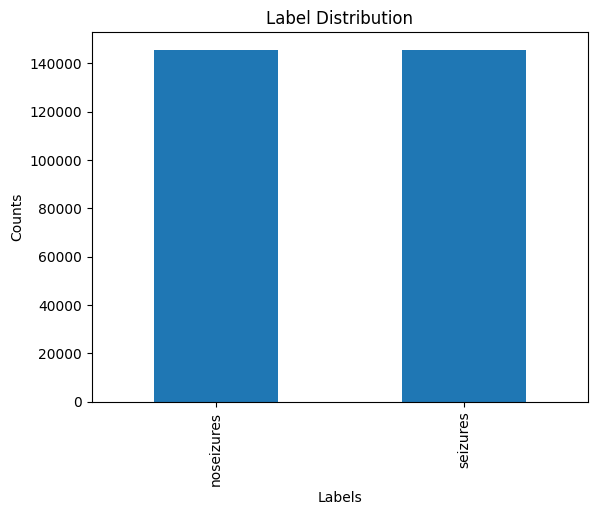

In [7]:
# Visualize the label column
label_counts = data['label_class'].value_counts()
label_counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Distribution')
plt.show()

In [8]:
# Separate features and labels
X = data.drop("label_class", axis=1)
y = data["label_class"]

In [9]:
# Convert labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [10]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [11]:
# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Convert the data to TensorFlow tensors
X_train_tensor = tf.constant(X_train_scaled, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.int32)
X_test_tensor = tf.constant(X_test_scaled, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.int32)

In [13]:
# Define the GNN model
class GNNModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(GNNModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(16, activation='relu')
        self.dense2 = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return x

In [14]:
# Create the GNN model
num_classes = len(label_encoder.classes_)
model = GNNModel(num_classes)

In [15]:
# Define loss function and optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [16]:
# Training loop
epochs = 50
batch_size = 32
steps_per_epoch = len(X_train_scaled) // batch_size

In [17]:
train_loss_history = []
test_loss_history = []
train_accuracy_history = []
test_accuracy_history = []

In [18]:
for epoch in range(epochs):
    for step in range(steps_per_epoch):
        start = step * batch_size
        end = (step + 1) * batch_size
        with tf.GradientTape() as tape:
            predictions = model(X_train_tensor[start:end])
            loss = loss_object(y_train_tensor[start:end], predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss = loss_object(y_train_tensor, model(X_train_tensor))
    test_loss = loss_object(y_test_tensor, model(X_test_tensor))
    train_loss_history.append(train_loss.numpy())
    test_loss_history.append(test_loss.numpy())

    y_pred_train = np.argmax(model(X_train_tensor).numpy(), axis=1)
    y_pred_test = np.argmax(model(X_test_tensor).numpy(), axis=1)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50, Train Loss: 0.3023, Train Accuracy: 0.8778, Test Loss: 0.3035, Test Accuracy: 0.8760
Epoch 2/50, Train Loss: 0.2910, Train Accuracy: 0.8831, Test Loss: 0.2915, Test Accuracy: 0.8820
Epoch 3/50, Train Loss: 0.2851, Train Accuracy: 0.8861, Test Loss: 0.2854, Test Accuracy: 0.8856
Epoch 4/50, Train Loss: 0.2803, Train Accuracy: 0.8879, Test Loss: 0.2804, Test Accuracy: 0.8876
Epoch 5/50, Train Loss: 0.2769, Train Accuracy: 0.8893, Test Loss: 0.2772, Test Accuracy: 0.8890
Epoch 6/50, Train Loss: 0.2746, Train Accuracy: 0.8903, Test Loss: 0.2754, Test Accuracy: 0.8896
Epoch 7/50, Train Loss: 0.2729, Train Accuracy: 0.8910, Test Loss: 0.2740, Test Accuracy: 0.8902
Epoch 8/50, Train Loss: 0.2717, Train Accuracy: 0.8917, Test Loss: 0.2730, Test Accuracy: 0.8908
Epoch 9/50, Train Loss: 0.2707, Train Accuracy: 0.8920, Test Loss: 0.2723, Test Accuracy: 0.8913
Epoch 10/50, Train Loss: 0.2701, Train Accuracy: 0.8923, Test Loss: 0.2718, Test Accuracy: 0.8915
Epoch 11/50, Train Loss: 0.26

In [19]:
# Evaluation
y_pred_train_prob = model(X_train_tensor).numpy()
y_pred_test_prob = model(X_test_tensor).numpy()

# Convert probabilities to class indices
y_pred_train = np.argmax(y_pred_train_prob, axis=1)
y_pred_test = np.argmax(y_pred_test_prob, axis=1)


In [20]:
# F1 Score
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Accuracy
train_accuracy = np.mean(np.equal(y_train, y_pred_train))
test_accuracy = np.mean(np.equal(y_test, y_pred_test))

# Other metrics
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

# Accuracy
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train F1 Score: 0.8942021946744341
Test F1 Score: 0.8929794741171733
Train Accuracy: 0.894367164102256
Test Accuracy: 0.893128067826863


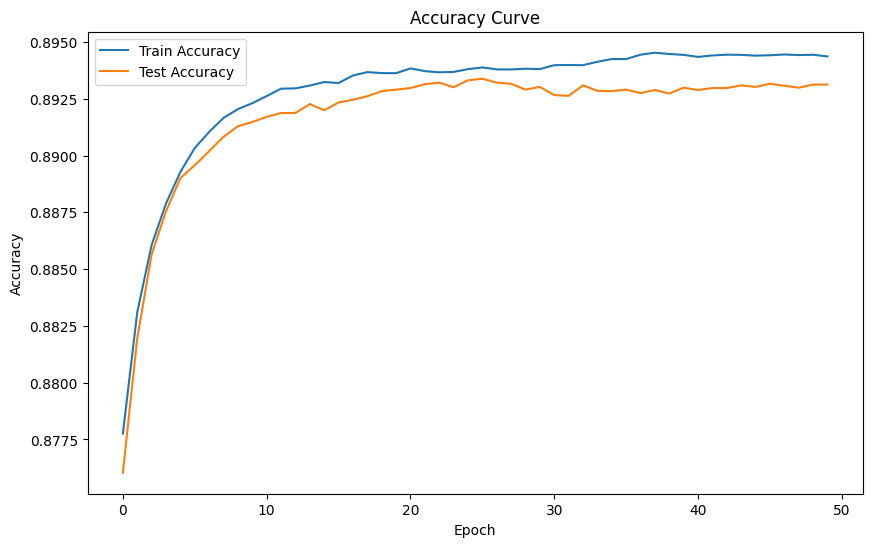

In [21]:
# Confusion Matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_accuracy_history, label='Train Accuracy')
plt.plot(range(epochs), test_accuracy_history, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()



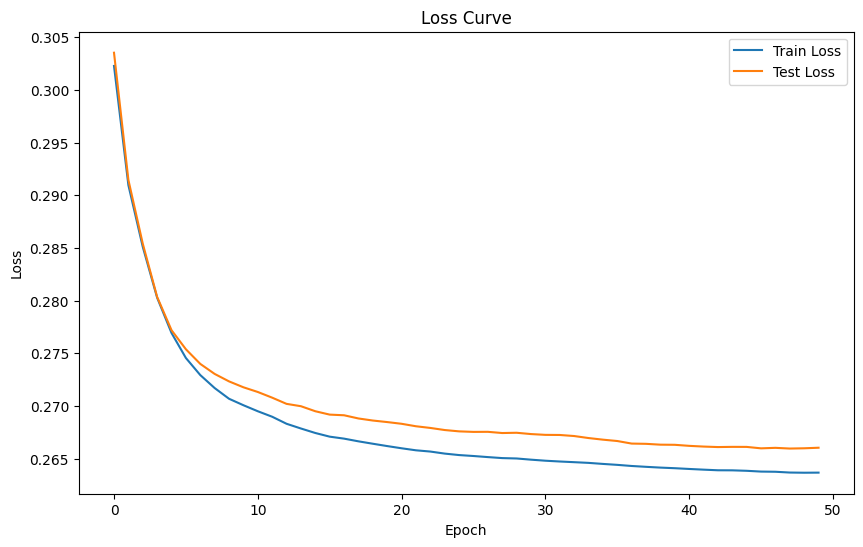

In [22]:
# Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [23]:
# Classification Report
report_train = classification_report(y_train, y_pred_train, target_names=label_encoder.classes_)
report_test = classification_report(y_test, y_pred_test, target_names=label_encoder.classes_)

In [24]:
# Print Confusion Matrix and Classification Report
print("Train Classification Report:")
print(report_train)

Train Classification Report:
              precision    recall  f1-score   support

  noseizures       0.87      0.93      0.90    116674
    seizures       0.93      0.86      0.89    116388

    accuracy                           0.89    233062
   macro avg       0.90      0.89      0.89    233062
weighted avg       0.90      0.89      0.89    233062



In [25]:
print("Test Classification Report:")
print(report_test)

Test Classification Report:
              precision    recall  f1-score   support

  noseizures       0.86      0.93      0.90     28990
    seizures       0.93      0.85      0.89     29276

    accuracy                           0.89     58266
   macro avg       0.90      0.89      0.89     58266
weighted avg       0.90      0.89      0.89     58266



In [26]:
# ROC Curve
# Compute ROC AUC score
#roc_auc_train = roc_auc_score(y_train, y_pred_train_prob, multi_class='ovr')
#oc_auc_test = roc_auc_score(y_test, y_pred_test_prob, multi_class='ovr')

from sklearn.metrics import roc_auc_score
import numpy as np

# Assuming y_pred_train_prob and y_pred_test_prob are the predicted probabilities for each class
# You may need to extract the probabilities for each class depending on your model's output
# For example, if y_pred_train_prob is of shape (27443, 2), you may need to use y_pred_train_prob[:, 1] for class 1

# Calculate ROC AUC score for each class
roc_auc_train = []
roc_auc_test = []

for i in range(num_classes):  # Replace num_classes with the actual number of classes
    roc_auc_train.append(roc_auc_score(y_train == i, y_pred_train_prob[:, i]))
    roc_auc_test.append(roc_auc_score(y_test == i, y_pred_test_prob[:, i]))

# Print or use roc_auc_train and roc_auc_test as needed
print("ROC AUC Train:", np.mean(roc_auc_train))
print("ROC AUC Test:", np.mean(roc_auc_test))


ROC AUC Train: 0.9533997340216382
ROC AUC Test: 0.9527877131684976


In [34]:
print(y_pred_train_prob.shape)

(233062, 2)


ROC AUC Train: 0.9533997340216382
ROC AUC Test: 0.9527877131684976


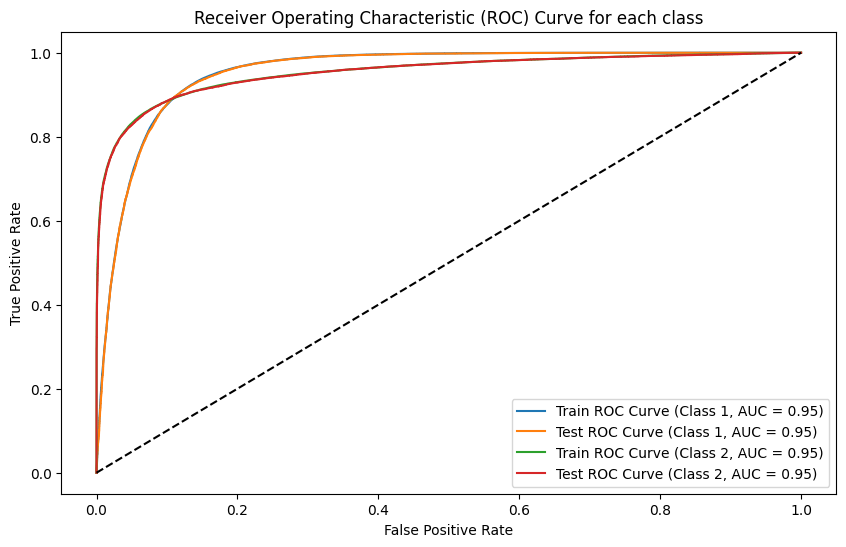

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

# Assuming y_pred_train_prob and y_pred_test_prob are the predicted probabilities for each class
# Extract the probabilities for each class
y_pred_train_prob = model(X_train_tensor).numpy()
y_pred_test_prob = model(X_test_tensor).numpy()

# Convert probabilities to class indices
y_pred_train = np.argmax(y_pred_train_prob, axis=1)
y_pred_test = np.argmax(y_pred_test_prob, axis=1)

# Calculate ROC AUC score for each class
roc_auc_train = []
roc_auc_test = []

for i in range(num_classes):  # Replace num_classes with the actual number of classes
    roc_auc_train.append(roc_auc_score(y_train == i, y_pred_train_prob[:, i]))
    roc_auc_test.append(roc_auc_score(y_test == i, y_pred_test_prob[:, i]))

# Print or use roc_auc_train and roc_auc_test as needed
print("ROC AUC Train:", np.mean(roc_auc_train))
print("ROC AUC Test:", np.mean(roc_auc_test))

# Plot ROC curves
plt.figure(figsize=(10, 6))

for i in range(num_classes):
    fpr_train, tpr_train, _ = roc_curve(y_train == i, y_pred_train_prob[:, i])
    roc_auc_train_class = auc(fpr_train, tpr_train)
    plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (Class {i + 1}, AUC = {roc_auc_train_class:.2f})')

    fpr_test, tpr_test, _ = roc_curve(y_test == i, y_pred_test_prob[:, i])
    roc_auc_test_class = auc(fpr_test, tpr_test)
    plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (Class {i + 1}, AUC = {roc_auc_test_class:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for each class')
plt.legend()
plt.show()


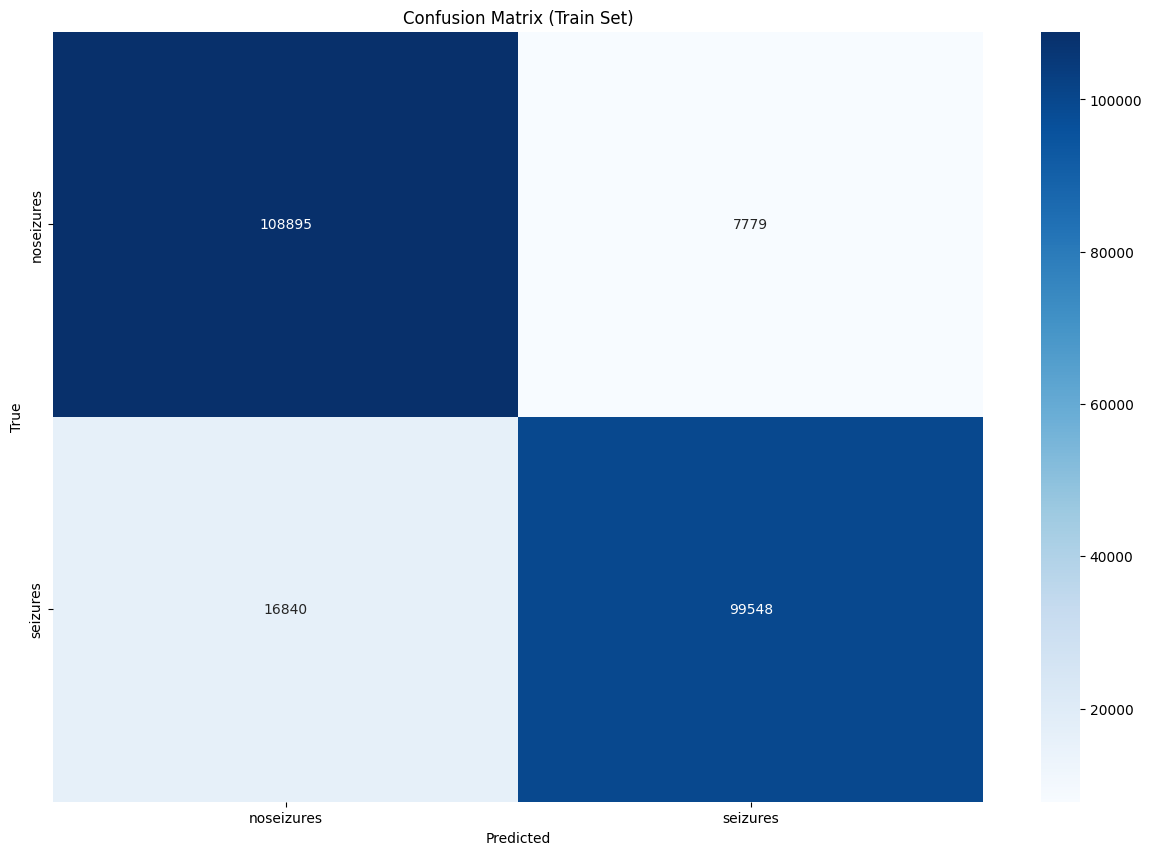

In [38]:
# Plot Confusion Matrix Heatmap for Train Set
plt.figure(figsize=(15, 10))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Train Set)')
plt.show()

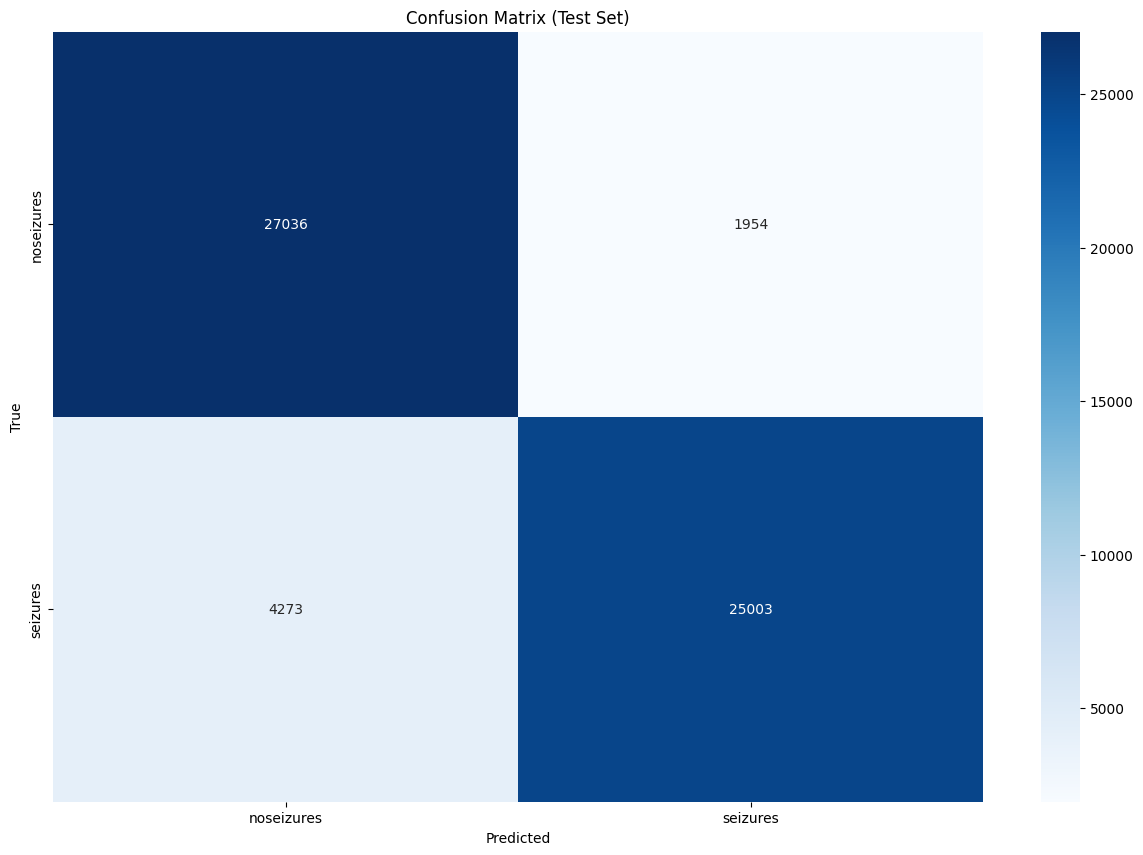

In [39]:
# Plot Confusion Matrix Heatmap for Test Set
plt.figure(figsize=(15, 10))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()